In [245]:
# import the packages needed 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier # libraries in sklearn 
from sklearn.ensemble import RandomForestClassifier # libraries in sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

store = pd.read_csv("Superstore.csv")

# define a function for calculating the metric to be used later 
def classification_metrics(Y_pred, Y_true):
    acc = accuracy_score(Y_true, Y_pred)
    precision = precision_score(Y_true, Y_pred)
    recall = recall_score(Y_true, Y_pred)
    f1score = f1_score(Y_true, Y_pred)
    auc = roc_auc_score(Y_true, Y_pred)

    return acc, precision, recall, f1score, auc

# define a function for printing the metrics 
def display_metrics(classifierName,Y_pred,Y_true):
    print ("______________________________________________")
    print ("Model: "+classifierName)
    acc, precision, recall, f1score, auc = classification_metrics(Y_pred,Y_true)
    print ("Accuracy: "+str(acc))
    print ("Precision: "+str(precision))
    print ("Recall: "+str(recall))
    print ("F1-score: "+str(f1score))
    print ("AUC: "+str(auc))
    print ("______________________________________________")
    print ("")


In [6]:
store.head()

,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,...,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
0,Paper,Lombard,Small Box,3035,Mark Bailey,Home Office,Office Supplies,0.01,10074,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,...,0.36,-76,Central,11/18/1951,53,11/9/2018,Regular Air,5,Illinois,5
1,Paper,Lombard,Wrap Bag,3035,Mark Bailey,Home Office,Office Supplies,0.04,10079,Telephone Message Books with Fax/Mobile Sectio...,...,0.39,52,Central,11/19/1951,76,11/12/2016,Regular Air,1,Illinois,6
2,Pens & Art Supplies,Southbury,Wrap Bag,3385,Daniel Richmond,Corporate,Office Supplies,0.04,11012,"Premium Writing Pencils, Soft, #2 by Central A...",...,0.57,-22,East,3/1/1961,16,11/23/2017,Express Air,2,Connecticut,3
3,Binders and Binder Accessories,Coachella,Small Box,3133,Kristine Singleton,Corporate,Office Supplies,0.10,10646,Fellowes Black Plastic Comb Bindings,...,0.39,-350,West,6/27/1961,65,1/25/2018,Regular Air,8,California,6
4,Rubber Bands,Coachella,Wrap Bag,3133,Kristine Singleton,Corporate,Office Supplies,0.03,10138,Assorted Color Push Pins,...,0.52,4,West,6/28/1961,19,1/25/2018,Regular Air,1,California,2


In [145]:
store_q1 = store[['Sales', 'Unit Price', 'Profit']]

In [146]:
store_profit10 = store_q1[store_q1['Profit'] > 10]

In [147]:
store_profit10.values[250,1]

20

In [21]:
store_profit10.loc[250, 'Sales']

27

In [23]:
store_profit10.reset_index()

,index,Sales,Unit Price,Profit
0,1,76,6,52
1,8,69,8,45
2,10,832,23,70
3,12,681,126,426
4,15,280,12,16
...,...,...,...,...
4298,9413,275,17,24
4299,9415,44,3,18
4300,9416,252,60,40
4301,9423,825,71,569


In [42]:
store_profit10.loc[250, :]

Sales         27
Unit Price     9
Profit        19
Name: 250, dtype: int64

In [34]:
store_profit10.values[250,1]

20

In [27]:
store_profit10.iat[250, 1]

20

In [31]:
row_250 = store_profit10.iloc[250]
row_250

Sales         584
Unit Price     20
Profit         77
Name: 583, dtype: int64

In [33]:
store_profit10.loc[250, "Sales"]

27

In [40]:
store_profit10.iloc[250,:]

Sales         584
Unit Price     20
Profit         77
Name: 583, dtype: int64

In [36]:
store_profit10

,Sales,Unit Price,Profit
1,76,6,52
8,69,8,45
10,832,23,70
12,681,126,426
15,280,12,16
...,...,...,...
9413,275,17,24
9415,44,3,18
9416,252,60,40
9423,825,71,569


In [48]:
store_profit = store_profit10.reset_index()
store_profit

,index,Sales,Unit Price,Profit
0,1,76,6,52
1,8,69,8,45
2,10,832,23,70
3,12,681,126,426
4,15,280,12,16
...,...,...,...,...
4298,9413,275,17,24
4299,9415,44,3,18
4300,9416,252,60,40
4301,9423,825,71,569


In [55]:
store_profit10.iloc[250,1]
store_profit10

,Sales,Unit Price,Profit
1,76,6,52
8,69,8,45
10,832,23,70
12,681,126,426
15,280,12,16
...,...,...,...
9413,275,17,24
9415,44,3,18
9416,252,60,40
9423,825,71,569


In [149]:
# 3. Use the Superstore data. Create a new variable Total Cost (sum of sales and shipping cost). 
# Extract the following columns in this order: Sales, Shipping Cost, Total Cost. 
# Keep only transactions in California. 
# What's the value at index [150, 2]? 

store.columns

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price'],
      dtype='object')

In [154]:
store['Total Cost'] = store['Sales']+store['Shipping Cost']
store.columns

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price', 'Total Cost'],
      dtype='object')

In [179]:
# store_cali.values[150,2]

store_cali_columns = store[store['State'] == 'California'][['Sales', 'Shipping Cost', 'Total Cost']]
store_cali_columns.values[150,:]

array([380,   9, 389], dtype=int64)

In [285]:
# 4. Use the Superstore data. First, find the category with the most transactions with negative profit.
# For that category, how many transactions have negative profit? 

# Find transactions with negative profit
negative_profit_transactions = store[store['Profit'] < 0]

# Group the data by category and count the number of negative profit transactions for each category
category_negative_profit_count = negative_profit_transactions['Category'].value_counts()

category_negative_profit_count


Paper                             753
Binders and Binder Accessories    561
Computer Peripherals              413
Storage & Organization            383
Office Furnishings                356
Telephones and Communication      344
Pens & Art Supplies               335
Tables                            268
Appliances                        233
Chairs & Chairmats                218
Office Machines                   142
Bookcases                         141
Rubber Bands                      106
Scissors, Rulers and Trimmers      98
Envelopes                          89
Labels                             58
Copiers and Fax                    34
Name: Category, dtype: int64

In [70]:
store.columns

Index(['Category', 'City', 'Container', 'Customer ID', 'Customer Name',
       'Customer Segment', 'Department', 'Discount', 'Item ID', 'Item',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Postal Code', 'Product Base Margin', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price'],
      dtype='object')

In [79]:
# 5. Use the Superstore data. How many unique customer names are there in the state of Washington? 
store_washington = store[store['State'] == 'Washington']
store_washington['Customer Name'].nunique()

41

In [87]:
# 6. Use the Superstore data. What's the most number of transactions made by a customer in the Central Region? 21
store['Region'].unique()
store_Central = store[store['Region'] == 'Central']
store_Central.head(2)


,Category,City,Container,Customer ID,Customer Name,Customer Segment,Department,Discount,Item ID,Item,...,Product Base Margin,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price
0,Paper,Lombard,Small Box,3035,Mark Bailey,Home Office,Office Supplies,0.01,10074,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,...,0.36,-76,Central,11/18/1951,53,11/9/2018,Regular Air,5,Illinois,5
1,Paper,Lombard,Wrap Bag,3035,Mark Bailey,Home Office,Office Supplies,0.04,10079,Telephone Message Books with Fax/Mobile Sectio...,...,0.39,52,Central,11/19/1951,76,11/12/2016,Regular Air,1,Illinois,6


In [102]:
grouped_store_central = store_Central.groupby(['Customer ID', 'Region'])['Order ID'].count()
grouped_store_central.reset_index()
grouped_store_central.sort_values( ascending = False)


Customer ID  Region 
308          Central    21
1999         Central    19
1106         Central    17
1402         Central    16
94           Central    14
                        ..
870          Central     1
2775         Central     1
2761         Central     1
2744         Central     1
2            Central     1
Name: Order ID, Length: 640, dtype: int64

In [113]:
# 7. Use the Superstore data. What's the total sales value across all products in the appliances category? 
store.columns
app_sales = store[store['Category']== 'Appliances']
app_total_sales = app_sales[['Category', 'Sales']]
app_total_sales['Sales'].sum()

456736

In [144]:
# 8. Use the Superstore data. For the customer with the most transactions in the entire data, 
# what's the total sales generated by that customer? 

biggest_spender = store.groupby('Customer ID').agg(Order_Count=('Order ID', 'count'), Total_Sales=('Sales', 'sum'))
# biggest_spender.sort_values(ascending = False)
biggest_spender.sort_values(by = 'Order_Count', ascending = False)

,Order_Count,Total_Sales
Customer ID,,
1193,27,32896
699,26,43231
2107,22,83651
2491,22,55239
2882,21,33910
...,...,...
2536,1,1306
2538,1,13
1172,1,869


In [185]:
store['Order Date'].head(10)

0     11/7/2017
1    11/10/2015
2    11/22/2016
3     1/12/2017
4     1/12/2017
5      9/3/2016
6     1/12/2017
7    10/19/2016
8    10/17/2017
9     1/12/2017
Name: Order Date, dtype: object

In [213]:
# 9. Use the Superstore data. What's the average sales across all transactions with order date in August 2015? 
# There are multiple ways to get the answer. One way is to extract month and year as in previous labs. 
# Look up pd.to_datetime() and the parameter 'format' in the documentation. 
# Then calculate average sales for transactions with order date in August 2015.
# Round your answer to nearest whole number.

store['Month'] = pd.to_datetime(store['Order Date'], format='%m/%d/%Y').dt.month
store['Year'] = pd.to_datetime(store['Order Date'], format='%m/%d/%Y').dt.year
store_aug2015 = store[(store['Month'] == 8) & (store['Year'] == 2015)]
average_sales_aug2015 = store_aug2015['Sales'].mean()
average_sales_aug2015

1084.8560606060605

In [222]:
# 10. Use the Superstore data. Crete a new variable Quarter based on month of order date. 
# Quarter = Q1 if the month of order date is from January to March. 
# Quarter = Q2 if the month of order date is from April to June. 
# Quarter = Q3 if the month of order date is from July to September. 
# Quarter = Q4 if the month of order date is from October to December. 

# Which quarter (regardless of year) has the most transactions? Enter the quarter number. 

store['Quarter'] = store['Month'].apply(lambda x: 
    'Q1' if 1 <= x <= 3 else 
    'Q2' if 4 <= x <= 6 else 
    'Q3' if 7 <= x <= 9 else 
    'Q4'
)

# Count the number of transactions in each quarter
quarter_counts = store['Quarter'].value_counts()
quarter_counts

Q4    3704
Q3    3499
Q1    2091
Q2     132
Name: Quarter, dtype: int64

## Decision Tree & Feature Importance



Feature ranking:
                    Feature Total Reduction of Criterion
0      Daily Internet Usage                      0.60709
1  Daily Time Spent on Site                     0.285544
2               Area Income                     0.052948
3                       Age                      0.03349
4           Country_Belgium                     0.011116
5          Country_Thailand                     0.009812
6           Country_Germany                          0.0
7                      Male                          0.0
8         Country_Argentina                          0.0
9         Country_Australia                          0.0


<Axes: title={'center': 'Feature importances'}, xlabel='Total Reduction of Criterion', ylabel='Feature'>

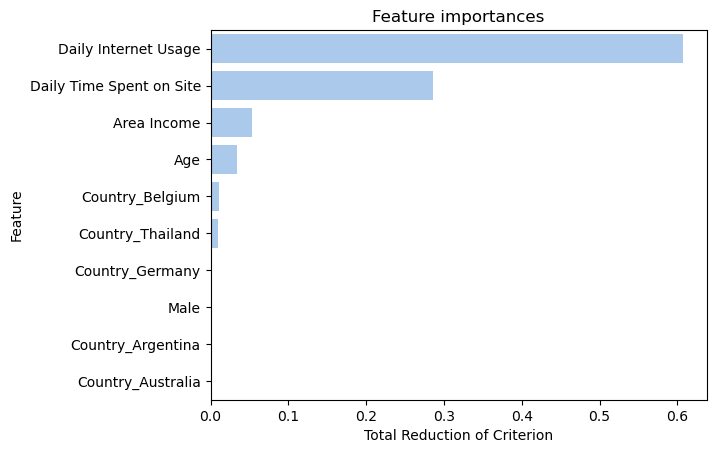

In [271]:
# 11. Use the advertising.csv data. Use sklearn. Use Clicked on Ad as the y-variable.

# Train a decision tree with these x-variables: 
# Age, Daily Time Spent on Site, Area Income, Male, Daily Internet Usage, Country Dummies
# Use 30% as test size, random_state=101. 

# Rank the variables based on feature importance. Which variable is the most important?

ads = pd.read_csv('advertising.csv')
ads2 = pd.get_dummies(ads, columns=['Country'], drop_first= True)
ads2.columns
ads2 = ads2.drop(['Ad Topic Line', 'Timestamp'], axis=1) # drop variables you don't want

X = ads2.drop('Clicked on Ad',axis=1) 
y = ads['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
X_train.head()

model11 = DecisionTreeClassifier(criterion='entropy', random_state=101, max_depth=5)
model11.fit(X_train, y_train)

# Feature Importance

importances = model11.feature_importances_ 
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

feature_names = X_train.columns 

fi = pd.DataFrame([feature_names[indices[0:10]], importances[indices][0:10]])
fi = fi.T
fi.columns = ['Feature', 'Total Reduction of Criterion']

print(fi)

plt.figure()
plt.title("Feature importances")

sns.set_color_codes("pastel")
sns.barplot(x="Total Reduction of Criterion", y="Feature", data=fi, color="b")



In [278]:
# 12. Use the advertising.csv data. Use sklearn. Use Clicked on Ad as the y-variable.

# Train 5 decision trees with these x-variables: 
# Age, Daily Time Spent on Site, Area Income, Male, Daily Internet Usage, Country Dummies
# Vary the maximum tree depth for each model (use 5, 6, 7, 8, 9). 
# Use 30% as test size, random_state=101. 

# What is the average accuracy for the 5 models for the test set? Round the answer to 2 decimals.

# Select the x-variables and target variable
ads2.columns
X = ads2.drop('Clicked on Ad', axis =1)
y = ads2['Clicked on Ad']

# Initialize a list to store accuracy scores
accuracy_scores = []

# Vary the maximum tree depth (5, 6, 7, 8, 9)
depths = [5, 6, 7, 8, 9]

# Train and evaluate the decision trees
for x in depths:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    model = DecisionTreeClassifier(criterion = 'entropy', random_state = 101, max_depth=x)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc, precision, recall, f1score, auc = classification_metrics(y_pred, y_test)
    accuracy_scores.append(acc)

np.mean(accuracy_scores)
print(np.mean(accuracy_scores))


0.9413333333333334


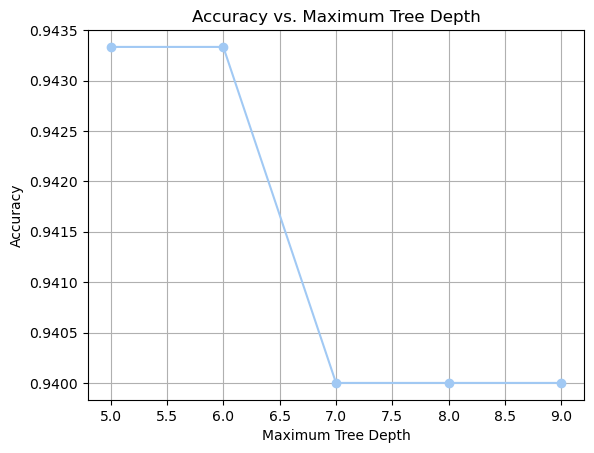

In [279]:
# 13. Use the results from the question above. Create a line plot of accuracy of the test set vs. maximum tree depth. 
# Upload the figure. 

depths = [5, 6, 7, 8, 9]
average_accuracy = np.mean(accuracy_scores)

# Create a line plot of accuracy vs. maximum tree depth
plt.plot(depths, accuracy_scores, marker = 'o', linestyle='-', color='b')
plt.title("Accuracy vs. Maximum Tree Depth")
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Accuracy")
plt.grid(True)


plt.savefig('accuracy_vs_depth.png')

# Show the plot (optional)
plt.show()


In [272]:
# 14. Use the advertising.csv data. Use sklearn. Use Clicked on Ad as the y-variable.

# Train 5 random forests with these x-variables: 
# Age, Daily Time Spent on Site, Area Income, Male, Daily Internet Usage, Country Dummies
# Vary the number of trees for random forest (use 10, 100, 250, 500, 750). 
# Use 30% as test size, random_state=101. 

# What is the average accuracy for the 5 models for the test set? Round the answer to 2 decimals.


# Select the x-variables and target variable
ads2.columns
X = ads2.drop('Clicked on Ad', axis =1)
y = ads2['Clicked on Ad']

# Initialize a list to store accuracy scores
accuracy_scores = []

# Vary the maximum tree depth (5, 6, 7, 8, 9)
depths = [10, 100, 250, 500, 750]

# Train and evaluate the decision trees
for x in depths:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    model14 = RandomForestClassifier(n_estimators=x, random_state=101)
    model14.fit(X_train, y_train)
    y_pred = model14.predict(X_test)
    
    acc, precision, recall, f1score, auc = classification_metrics(y_pred, y_test)
    accuracy_scores.append(acc)

np.mean(accuracy_scores)
print(np.mean(accuracy_scores))


0.9493333333333333


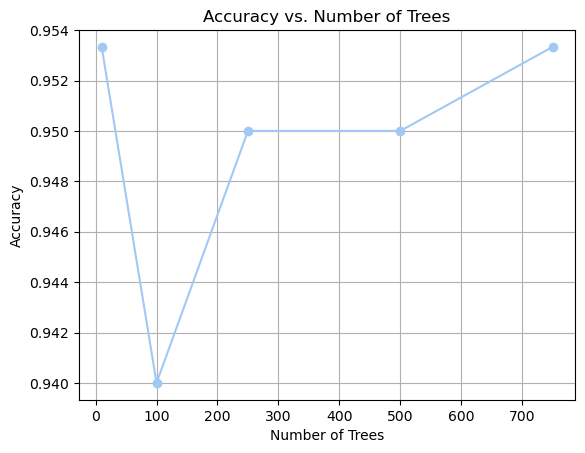

In [275]:
# 15. Use the results from the question above. Create a line plot of accuracy of the test set vs. number of trees. 
# Upload the figure. 

plt.plot(depths, accuracy_scores, marker = 'o', linestyle='-', color='b')
plt.title("Accuracy vs. Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)


plt.savefig('accuracy_vs_numberoftrees.png')

# Show the plot (optional)
plt.show()

In [297]:
# 16. Use the advertising.csv data. Use sklearn. Use Clicked on Ad as the y-variable.

# Train SVMs with these x-variables: Age, Daily Time Spent on Site, Area Income, Male, Daily Internet Usage, Country Dummies

# Vary the parameters C and gamma for the models: 

# For C: use 1, 5, 10
# For gamma: use 0.1, 0.5, 1.0

# Train an SVM for each combination of C and gamma. In total, there are 9 SVMs.
# Use 30% as test size, random_state=101. 

# What is the average precision for all models for the test set? Round to 2 decimals.

# You may use the code below and fill in the 2 TODO sections (to set up X and y; and to calculate y_pred)

# Select the x-variables and target variable
ads2.columns
X = ads2.drop('Clicked on Ad', axis =1)
y = ads2['Clicked on Ad']

# Initialize a list to store precision scores
precisions = []
cs = [1,5,10]
gamma = [0.1,0.5,1.0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
for c in cs:
    for g in gamma:
        
        model16 = SVC(C=c, gamma= g, random_state = 101)
        model16.fit(X_train, y_train)
        y_pred = model16.predict(X_test)
        acc, precision, recall, f1score, auc = classification_metrics(y_pred, y_test)
        precisions.append(precision)
        print('C:', c, '|', 'gamma:', g)
        display_metrics('SVM', y_pred, y_test)
        


C: 1 | gamma: 0.1
______________________________________________
Model: SVM
Accuracy: 0.45666666666666667
Precision: 0.45666666666666667
Recall: 1.0
F1-score: 0.6270022883295195
AUC: 0.5
______________________________________________

C: 1 | gamma: 0.5
______________________________________________
Model: SVM
Accuracy: 0.45666666666666667
Precision: 0.45666666666666667
Recall: 1.0
F1-score: 0.6270022883295195
AUC: 0.5
______________________________________________

C: 1 | gamma: 1.0
______________________________________________
Model: SVM
Accuracy: 0.45666666666666667
Precision: 0.45666666666666667
Recall: 1.0
F1-score: 0.6270022883295195
AUC: 0.5
______________________________________________

C: 5 | gamma: 0.1
______________________________________________
Model: SVM
Accuracy: 0.45666666666666667
Precision: 0.45666666666666667
Recall: 1.0
F1-score: 0.6270022883295195
AUC: 0.5
______________________________________________

C: 5 | gamma: 0.5
__________________________________________

In [295]:
xQ16 = X
yQ16 =y
xQ16tr, xQ16te, yQ16tr, yQ16te = train_test_split(xQ16, yQ16, test_size=0.30, random_state=101)

precisions = []
for i in cs:
    for j in gamma:
        Q16mod = SVC(C = i, gamma = j, random_state = 101)
        Q16mod.fit(xQ16tr, yQ16tr)
        yQ16Pred = Q16mod.predict(xQ16te)
        print('C:', i, '|', 'gamma:', j)
        display_metrics('SVM', yQ16Pred, yQ16te)
        acc, precision, recall, f1score, auc = classification_metrics(yQ16Pred, yQ16te)
        precisions.append(precision)

C: 1 | gamma: 0.1
______________________________________________
Model: SVM
Accuracy: 0.45666666666666667
Precision: 0.45666666666666667
Recall: 1.0
F1-score: 0.6270022883295195
AUC: 0.5
______________________________________________

C: 1 | gamma: 0.5
______________________________________________
Model: SVM
Accuracy: 0.45666666666666667
Precision: 0.45666666666666667
Recall: 1.0
F1-score: 0.6270022883295195
AUC: 0.5
______________________________________________

C: 1 | gamma: 1.0
______________________________________________
Model: SVM
Accuracy: 0.45666666666666667
Precision: 0.45666666666666667
Recall: 1.0
F1-score: 0.6270022883295195
AUC: 0.5
______________________________________________

C: 5 | gamma: 0.1
______________________________________________
Model: SVM
Accuracy: 0.45666666666666667
Precision: 0.45666666666666667
Recall: 1.0
F1-score: 0.6270022883295195
AUC: 0.5
______________________________________________

C: 5 | gamma: 0.5
__________________________________________